### What is Predictive Analysis?
Predictive Analysis is used to analyze current and historical data to make predictions about future or otherwise unknown events.

### Steps of Predictive Analysis:-
1. Define Problem.
2. Data Collection.
3. Data Pre-Processing.
4. EDA.
5. Model.
6. Deploy.

### Applications of Predictive Analysis:-
Few of them are as follows:
 ->Retail.
 ->Agriculture.
 ->Manufacturing.
 ->E-Commerce.
 ->Sales.
 ->Marketing.
 ->Health Insurance and so on.

### Implementation of MILEAGE PREDICTION

Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data

In [2]:
df=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

Data Preprocessing

In [5]:
### first we check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
### then we check for summary statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
### then we find corelation.
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


Remove Missing Values

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


Data Visualization

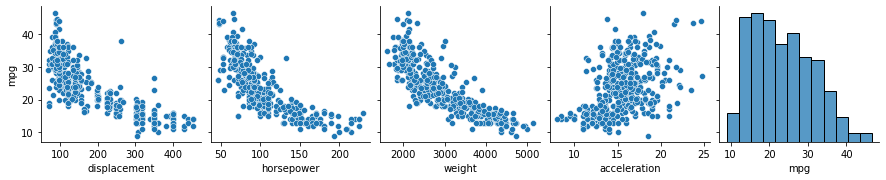

In [10]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration','mpg'],y_vars='mpg')

<AxesSubplot:xlabel='displacement', ylabel='mpg'>

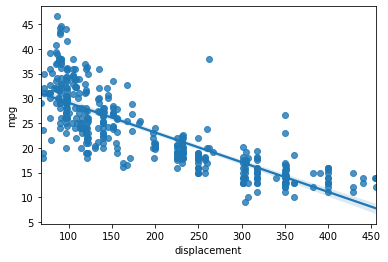

In [11]:
sns.regplot(x='displacement',y='mpg',data=df)

Define Target Variable y and Feature X

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
y=df['mpg']

In [14]:
y.shape

(392,)

In [15]:
X=df[['displacement','horsepower','weight','acceleration']]

In [16]:
X.shape

(392, 4)

Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
ss=StandardScaler()

In [19]:
X=ss.fit_transform(X)

Train Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=192529)

In [24]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr=LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.intercept_

23.437146205102994

In [29]:
lr.coef_

array([-0.73968786, -1.55093211, -4.50839935, -0.07836656])

Predict Data

In [30]:
y_pred=lr.predict(X_test)

In [31]:
y_pred

array([23.45016622, 29.32516033, 29.77228603, 23.0718391 , 32.3593637 ,
       25.24968985, 20.74034177, 26.54954947, 17.17025746, 31.92262642,
       30.88896413, 26.1449333 , 19.87230263, 18.77607948, 24.4247408 ,
       25.84355402, 22.64405946, 30.33855651, 31.12842135, 18.21211578,
       20.0903295 , 23.5039348 , 28.25298432, 25.90374372, 23.65486026,
       23.32273141, 27.57934061, 16.50497922, 29.42111318, 16.15350044,
       12.87866486, 20.76943576, 31.1713373 , 29.03441886, 28.19954578,
       21.05677145, 26.50416653, 22.02322145, 18.91277922, 10.78430644,
       20.20297371, 29.52302663, 31.06050976, 27.28461911, 20.07498761,
       24.78915024, 11.4655348 , 24.17180976, 28.11869358, 24.8907223 ,
       29.63735313, 31.15887854, 15.0755352 , 24.06343493, 19.91348514,
        6.37144488, 30.06899066, 32.58758114, 10.46945996, 31.96229942,
       25.46524252, 29.50943062, 18.31291563, 31.25008487, 31.79137899,
       22.76114005, 20.7482228 , 29.26156892, 29.59453294, 25.85

Model Accuracy

In [32]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [33]:
mean_absolute_error(y_test,y_pred)

3.3680820718518483

In [34]:
mean_absolute_percentage_error(y_test,y_pred)

0.14857064524172606

In [35]:
r2_score(y_test,y_pred)

0.6746183746742352

Polynomial Regression

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
poly=PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [38]:
X_train2=poly.fit_transform(X_train)

In [39]:
X_test2=poly.fit_transform(X_test)

In [40]:
lr.fit(X_train2,y_train)

LinearRegression()

In [41]:
lr.intercept_

21.08055498586241

In [42]:
lr.coef_

array([-2.26443627, -5.28629942, -1.71359608, -0.97338264,  1.39235317,
        0.51468277, -0.31837587,  0.7039444 , -0.38374565,  1.05229343])

In [43]:
y_pred_poly=lr.predict(X_test2)

Model Accuracy

In [44]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [45]:
mean_absolute_error(y_test,y_pred_poly)

2.9662517924643135

In [46]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12250840631913971

In [47]:
r2_score(y_test,y_pred_poly)

0.7285497368611851

CLASSIFICATION

Hand written digit prediction - Classification Analysis

Import library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [49]:
from sklearn.datasets import load_digits

In [50]:
df=load_digits()

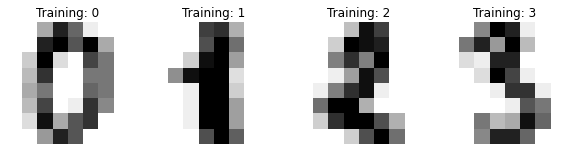

In [51]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" %label)

Data Preprocessing

Flatten Image

In [52]:
df.images.shape

(1797, 8, 8)

In [53]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [54]:
df.images[0].shape

(8, 8)

In [55]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [56]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [57]:
data[0].shape

(64,)

In [58]:
data.shape

(1797, 64)

Scaling Data

In [59]:
data.min()

0.0

In [60]:
data.max()

16.0

In [61]:
data=data/16

In [62]:
data.min()

0.0

In [63]:
data.max()

1.0

Train Test Split Data

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(data,df.target,test_size=0.7,random_state=192529)

In [66]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((539, 64), (1258, 64), (539,), (1258,))

Random Forest Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()

In [69]:
rf.fit(X_train,y_train)

RandomForestClassifier()

Predict Test Data

In [70]:
y_pred=rf.predict(X_test)

In [71]:
y_pred

array([7, 4, 4, ..., 2, 9, 5])

Model Accuracy

In [72]:
from sklearn.metrics import confusion_matrix,classification_report

In [73]:
confusion_matrix(y_test,y_pred)

array([[123,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0, 118,   0,   1,   0,   0,   0,   0,   0,   4],
       [  2,   0, 114,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 127,   0,   3,   0,   5,   3,   1],
       [  0,   0,   0,   0, 122,   0,   0,   5,   0,   1],
       [  0,   0,   0,   1,   1, 115,   0,   0,   0,   2],
       [  0,   0,   0,   0,   0,   1, 135,   0,   0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 116,   0,   0],
       [  0,   3,   1,   1,   0,   0,   0,   5, 114,   1],
       [  0,   2,   0,   2,   0,   1,   0,   0,   0, 126]], dtype=int64)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       124
           1       0.96      0.96      0.96       123
           2       0.99      0.98      0.99       116
           3       0.96      0.91      0.94       139
           4       0.98      0.95      0.96       128
           5       0.96      0.97      0.96       119
           6       1.00      0.99      1.00       136
           7       0.89      0.99      0.94       117
           8       0.97      0.91      0.94       125
           9       0.93      0.96      0.95       131

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258

